# This is Movie Classification Team 11's EDA Notebook

### Team Members:
Andrew Lund, Nicholas Morgam, Amay Umradia, Charles Webb

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tmdbsimple as tmdb
import requests
import pandas as pd
import time
import numpy as np
from ast import literal_eval
from collections import Counter
sns.set_context('poster')
sns.set_style('ticks')


#### Get TMDB Genre Labels

In [2]:
key = open('key.txt','r').read()
payload = '{}'
url = "https://api.themoviedb.org/3/genre/movie/list?api_key={0}&language=en-US&page={1}".format(key, str(1))
response = requests.request("GET", url, data=payload).json()

genreDict = dict(zip([i['id'] for i in response['genres']],
                     [i['name'] for i in response['genres']]))
genreDict

{12: 'Adventure',
 14: 'Fantasy',
 16: 'Animation',
 18: 'Drama',
 27: 'Horror',
 28: 'Action',
 35: 'Comedy',
 36: 'History',
 37: 'Western',
 53: 'Thriller',
 80: 'Crime',
 99: 'Documentary',
 878: 'Science Fiction',
 9648: 'Mystery',
 10402: 'Music',
 10749: 'Romance',
 10751: 'Family',
 10752: 'War',
 10770: 'TV Movie'}

#### Read in Scraped Movie DF

In [190]:
movies = pd.read_csv('Data/movie_df_with_imdb.csv', encoding='utf8', 
                     converters={'tmdb_genres':literal_eval, 'imdb_genres':literal_eval})
movies.release_date = pd.to_datetime(movies.release_date)
movies.head(10)

,tmdb_id,imdb_id,tmdb_genres,imdb_genres,binary_tmdb,binary_imdb,tmdb_plot,imdb_plot,popularity,release_date,title,vote_average,vote_count
0,278,tt0111161,"[18, 80]","[80, 18]",[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0],[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0],Framed in the 1940s for the double murder of h...,Chronicles the experiences of a formerly succe...,28.527767,1994-09-23,The Shawshank Redemption,8.5,9773
1,238,tt0068646,"[18, 80]","[80, 18]",[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0],[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0],"Spanning the years 1945 to 1955, a chronicle o...",When the aging head of a famous crime family d...,36.965452,1972-03-14,The Godfather,8.5,7394
2,424,tt0108052,"[18, 36, 10752]","[18, 36]",[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0],[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0],The true story of how businessman Oskar Schind...,Oskar Schindler is a vainglorious and greedy G...,19.945455,1993-11-29,Schindler's List,8.4,5518
3,240,tt0071562,"[18, 80]","[80, 18]",[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0],[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0],In the continuing saga of the Corleone crime f...,The continuing saga of the Corleone crime fami...,30.191804,1974-12-20,The Godfather: Part II,8.4,4249
4,452522,tt0278784,"[18, 9648]","[80, 18, 9648, 53]",[0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0],[0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0],Standalone version of the series pilot with an...,"When beautiful, young Laura Palmer is found br...",5.969249,1989-12-31,Twin Peaks,8.4,123
5,244786,tt2582802,[18],"[18, 10402]",[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0],[0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0],"Under the direction of a ruthless instructor, ...",A young and talented drummer attending a prest...,29.936676,2014-10-10,Whiplash,8.3,5544
6,333339,tt1677720,"[12, 878, 28]","[28, 12, 878]",[1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0],[1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0],When the creator of a popular video game syste...,"In the year 2045, the real world is a harsh pl...",81.290391,2018-03-28,Ready Player One,8.3,137
7,680,tt0110912,"[53, 80]","[80, 18]",[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0],[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0],"A burger-loving hit man, his philosophical par...",Jules Winnfield (Samuel L. Jackson) and Vincen...,39.232028,1994-09-10,Pulp Fiction,8.3,10794
8,282848,tt2986512,"[18, 878]","[12, 18, 10751, 9648, 878]",[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0],[1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0],"Orbiting a quiet backwater planet, the massed ...","Orbiting a quiet backwater planet, the massed ...",5.976601,2013-12-25,Doctor Who: The Time of the Doctor,8.3,112
9,550,tt0137523,[18],[18],[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0],[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0],A ticking-time-bomb insomniac and a slippery s...,A nameless first person narrator (Edward Norto...,42.100189,1999-10-15,Fight Club,8.3,11878


In [26]:
movies.dtypes

tmdb_id                  int64
imdb_id                 object
tmdb_genres             object
imdb_genres             object
binary_tmdb             object
binary_imdb             object
tmdb_plot               object
imdb_plot               object
popularity             float64
release_date    datetime64[ns]
title                   object
vote_average           float64
vote_count               int64
dtype: object

In [7]:
print(movies.title[10],'\n', movies.tmdb_plot[10])

Once Upon a Time in America 
 A former Prohibition-era Jewish gangster returns to the Lower East Side of Manhattan over thirty years later, where he once again must confront the ghosts and regrets of his old life


In [8]:
movies.describe()

,tmdb_id,popularity,vote_average,vote_count
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,69239.384000,16.974163,7.534100,1837.680000
std,120477.368898,19.321979,0.288601,2497.789501
min,11.000000,1.340784,7.200000,100.000000
25%,871.750000,7.674390,7.300000,270.000000
50%,10393.000000,10.356411,7.500000,728.000000
75%,57727.500000,21.583589,7.700000,2287.250000
max,455661.000000,341.104188,8.500000,16669.000000


### Distribution of TMDB Ratings in Dataset

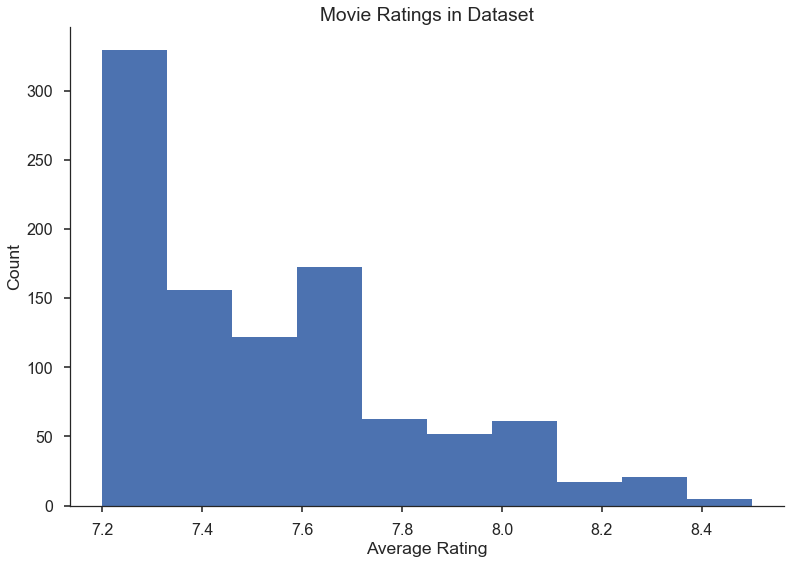

In [9]:
plt.hist(movies.vote_average)
plt.title('Movie Ratings in Dataset')
plt.xlabel('Average Rating')
plt.ylabel('Count')
sns.despine()

### Total Counts of TMDB Genres in Dataset

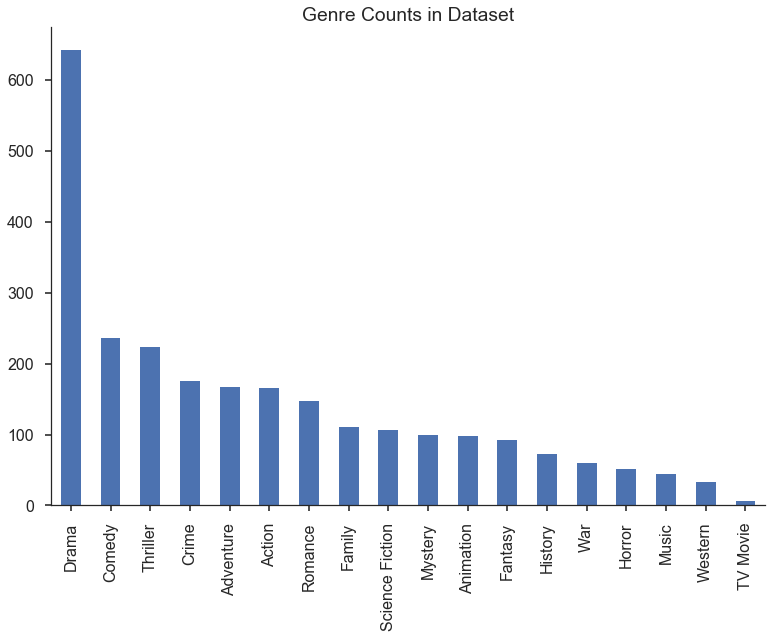

In [21]:
genre_list_ints = []
for sublist in list(movies.tmdb_genres):
    for item in sublist:
        genre_list_ints.append(item)

genre_list_strings = []
for genre in genre_list_ints:
    genre_list_strings.append(genreDict[genre])
    
genre_counts = Counter(genre_list_strings)
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index')
genre_df.sort_values(by = 0, ascending=False).plot(kind='bar', legend=False)
plt.title('Genre Counts in Dataset')
sns.despine()

### Counts of Movie Release Years in Dataset

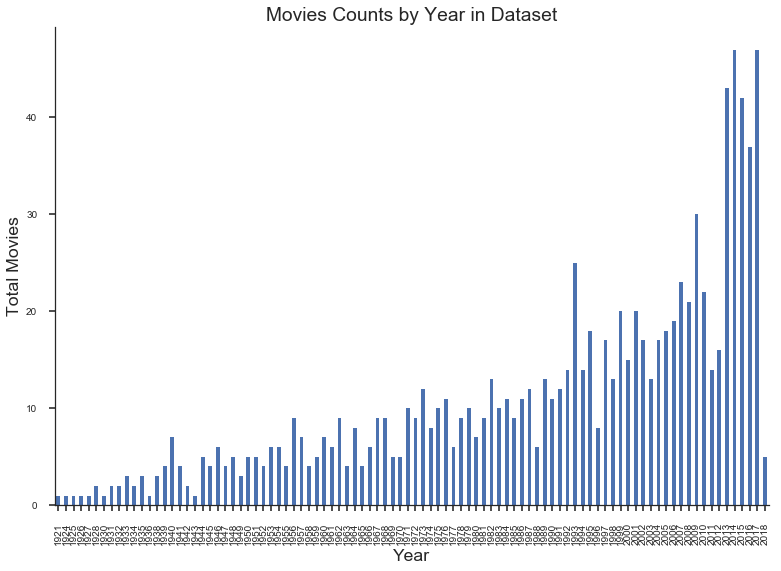

In [75]:
movie_years = [year.year for year in movies.release_date]
year_counts = Counter(movie_years)
year_df = pd.DataFrame.from_dict(year_counts, orient='index')
year_df.sort_index().plot(kind='bar', legend=False)
plt.title('Movies Counts by Year in Dataset')
plt.xticks()
plt.tick_params(labelsize=10)
plt.ylabel('Total Movies')
plt.xlabel('Year')
sns.despine()

### Count by Movie of Total TMDB & IMDB Genre Labels in Dataset

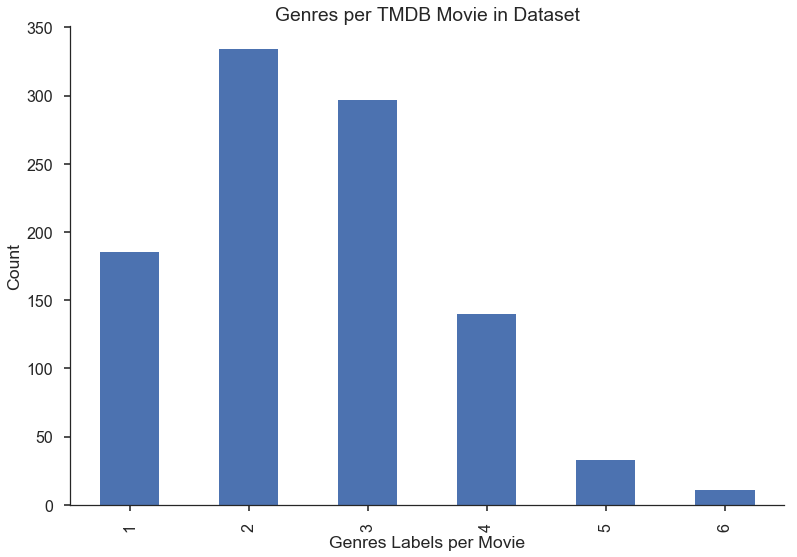

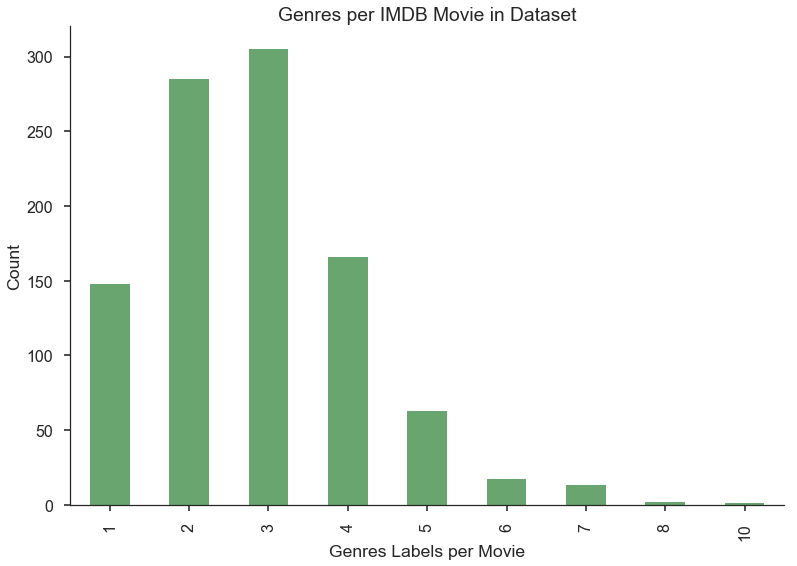

In [133]:
#count number of genres per movie
tmdb_num_genres_per_movie = [len(genres) for genres in movies.tmdb_genres]
imdb_num_genres_per_movie = [len(genres) for genres in movies.imdb_genres]

#collect counts and plot for both imdb and tmdb
tmdb_num_genre_counts = Counter(tmdb_genres_per_movie)
tmdb_genre_counts_df = pd.DataFrame.from_dict(tmdb_num_genre_counts, orient='index')
tmdb_genre_counts_df = tmdb_genre_counts_df.sort_index()
tmdb_genre_counts_df.plot(kind='bar', legend=False)
plt.title('Genres per TMDB Movie in Dataset')
plt.xlabel('Genres Labels per Movie')
plt.ylabel('Count')
sns.despine()


imdb_num_genre_counts = Counter(imdb_genres_per_movie)
imdb_genre_counts_df = pd.DataFrame.from_dict(imdb_num_genre_counts, orient='index')
imdb_genre_counts_df = imdb_genre_counts_df.sort_index()
imdb_genre_counts_df.plot(kind='bar', legend=False, color='#69a56e')
plt.title('Genres per IMDB Movie in Dataset')
plt.xlabel('Genres Labels per Movie')
plt.ylabel('Count')
sns.despine()

### Distribution of TMDB & IMDB Plot Lengths

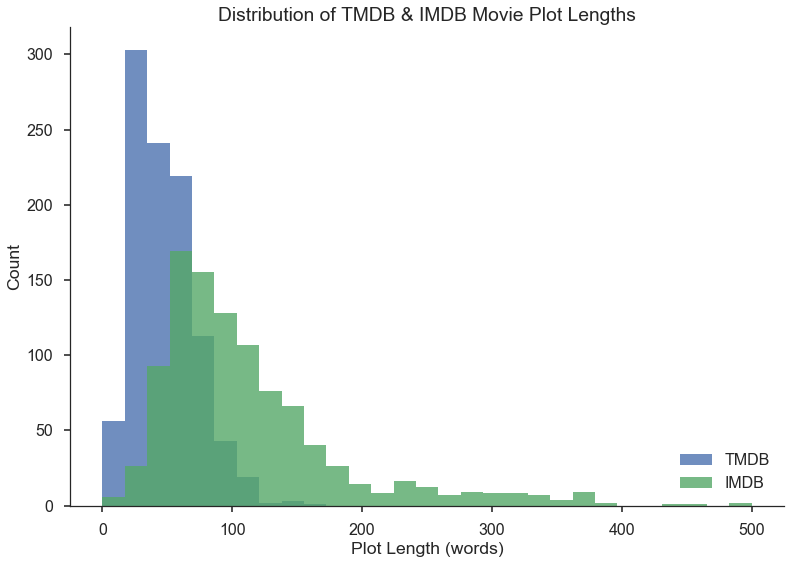

In [153]:
#tmdb lengths
tmdb_plot_lengths = []
for plot in movies.tmdb_plot:
    plot_length = len(plot.split())
    tmdb_plot_lengths.append(plot_length)
    
#imdb lengths
imdb_plot_lengths = []
for plot in movies.imdb_plot:
    plot_length = len(plot.split())
    imdb_plot_lengths.append(plot_length)
    
#plot tmdb lengths
bins = np.linspace(0, 500, 30)
plt.hist(tmdb_plot_lengths, bins, alpha = 0.8, label = 'TMDB')
plt.hist(imdb_plot_lengths, bins, alpha = 0.8, label = 'IMDB')
plt.xlabel('Plot Length (words)')
plt.ylabel('Count')
plt.title('Distribution of TMDB & IMDB Movie Plot Lengths')
plt.legend(loc='lower right')
sns.despine();

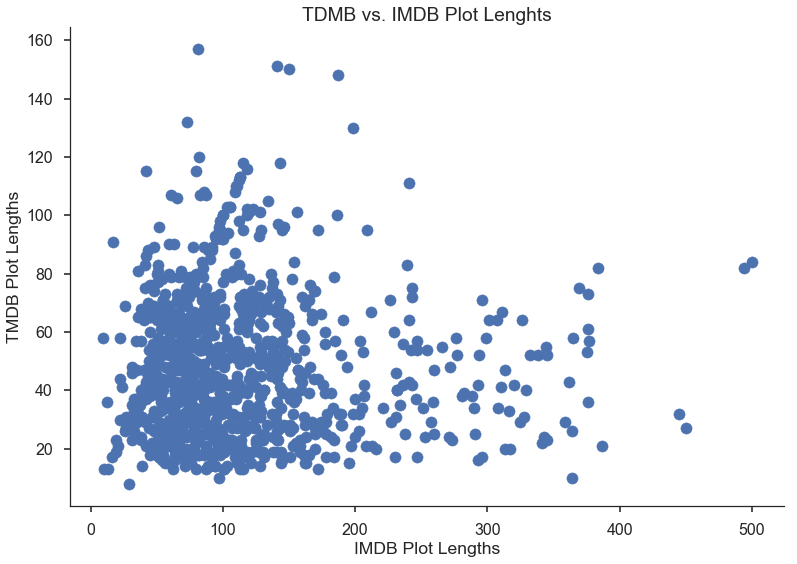

In [160]:
#scatter of TMDB vs IMDB plot lengths
plt.scatter(imdb_plot_lengths, tmdb_plot_lengths)
plt.title('TDMB vs. IMDB Plot Lenghts')
plt.xlabel('IMDB Plot Lengths')
plt.ylabel('TMDB Plot Lengths')
sns.despine();

#### More plot length metrics

In [182]:
print('Shortest and longest plots (words):')
print('TMDB: ', min(tmdb_plot_lengths),',', max(tmdb_plot_lengths))
print('Mean TMDB plot length:', np.mean(tmdb_plot_lengths))
print()
print('IMDB: ', min(imdb_plot_lengths),',', max(imdb_plot_lengths))
print('Mean IMDB plot length:', np.mean(imdb_plot_lengths))


Shortest and longest plots (words):
TMDB:  8 , 157
Mean TMDB plot length: 47.539

IMDB:  9 , 500
Mean IMDB plot length: 112.321


### Plot Lengths vs. Number of Genres per Movie

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


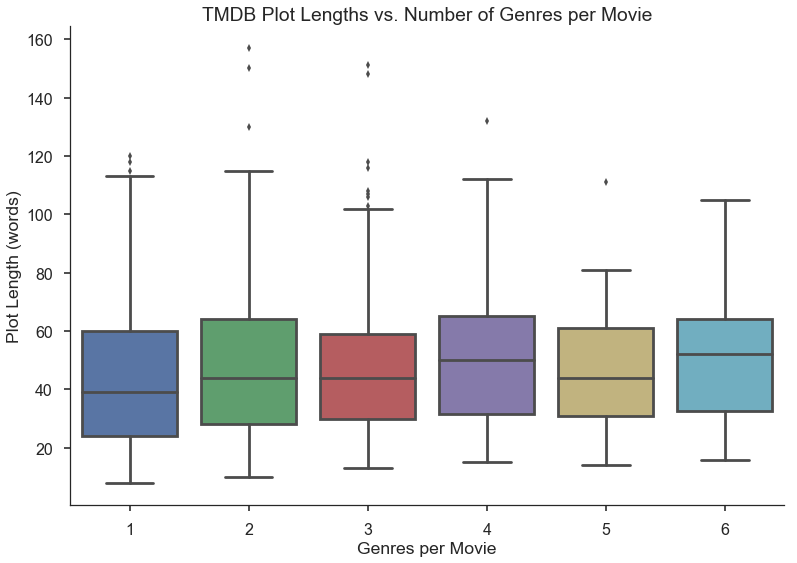

In [177]:
sns.boxplot(tmdb_num_genres_per_movie, tmdb_plot_lengths)
plt.title('TMDB Plot Lengths vs. Number of Genres per Movie')
plt.xlabel('Genres per Movie')
plt.ylabel('Plot Length (words)')
sns.despine()

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


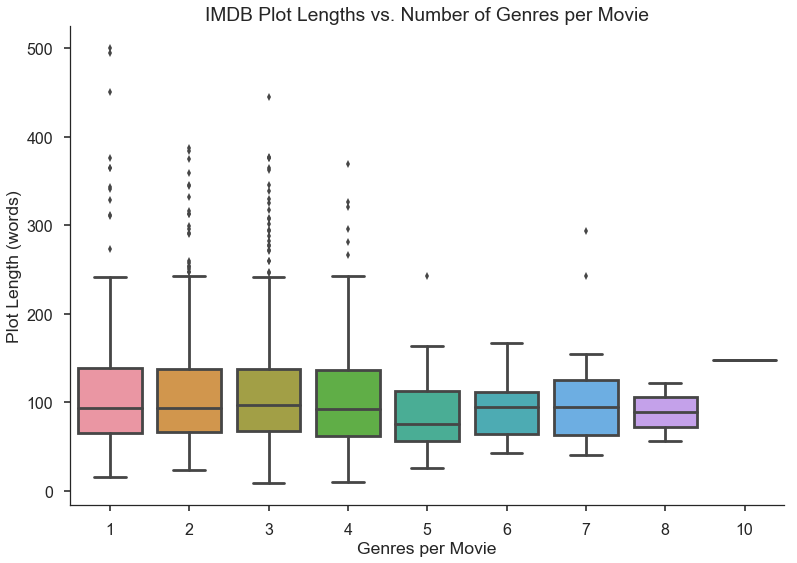

In [178]:
sns.boxplot(imdb_num_genres_per_movie, imdb_plot_lengths)
plt.title('IMDB Plot Lengths vs. Number of Genres per Movie')
plt.xlabel('Genres per Movie')
plt.ylabel('Plot Length (words)')
sns.despine()

In [186]:
pd.Series.tolist(movies.binary_imdb[0])

AttributeError: 'str' object has no attribute '_values'

In [188]:
type(movies.binary_imdb[0])

str